In [1]:
from utils import *
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C://Users/caleb/Documents/ML-Morph/simplemlmorph/simple-ml-morph/")

In [43]:
# Wrapper function to read in the ml-morph xml output file
def read_mlmorph_xml(xml):
    return dlib_xml_to_pandas(xml)

def coords_from_xml(df, nLM):

    def get_landmark(sample, x_names, y_names):    
        x_coord = sample.loc[:, [*x_names]]
        y_coord = sample.loc[:, [*y_names]]
        return x_coord, y_coord

    x_names, y_names = zip(*[(f"X{i}", f"Y{i}") for i in range(1, nLM)])
        
    x, y = get_landmark(df, x_names, y_names)
    imgs = list(zip(*x.index))[0]
    return x, y, imgs

def get_specimen_xy(x, y, img_file):
    x_coords = x.loc[img_file].values.flatten()
    y_coords = y.loc[img_file].values.flatten()
    
    n_landmarks = len(x_coords)
    colors = cm.rainbow(np.linspace(0, 1, n_landmarks))
    return x_coords, y_coords, colors

def plot_markers(x_coords, y_coords, img_file, marker_names, anchor=(1.2, .8)):
    
    fig, ax = plt.subplots(1)
    for index, _ in enumerate(x_coords):
        
        # Get coordinates for each individual marker
        X = x_coords[index]
        Y = y_coords[index]
        
        # Plot an individual marker - looping so colors are different
        ax.scatter(X, Y, 
                   label=marker_names[index])

    img = plt.imread(img_file)
    img_x_extent = img.shape[1]
    img_y_extent = img.shape[0]
    ax.imshow(img)
    ax.legend(bbox_to_anchor = anchor)
    ax.set_xlabel("<-----Pixels----->")
    ax.set_ylabel("<-----Pixels----->")
    ax.set_title(imgs[0])
    plt.show()

In [38]:
# read in xml file
xml = 'output.xml'
xml_df = read_mlmorph_xml(xml)

# read in coordinate data and image file paths
x, y, imgs = coords_from_xml(xml_df, 10)

markers = list(pd.read_csv("landmark-examples/50_training_formatted.csv").columns)
names = markers[0:len(markers):2][1:]

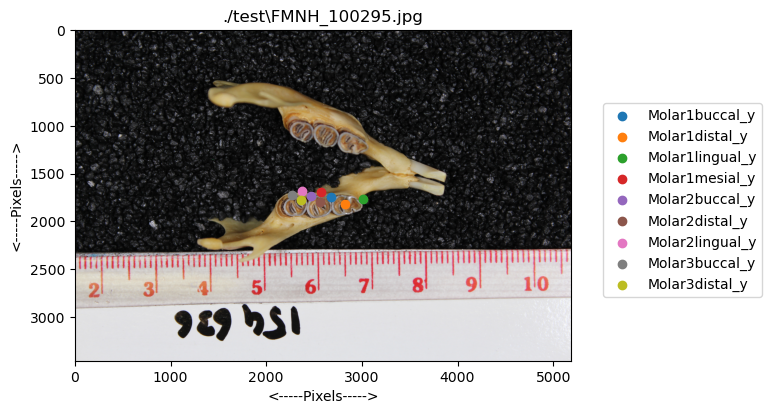

In [53]:
img = imgs[30]
x_coords, y_coords, colors = get_specimen_xy(x, y, img)
plot_markers(x_coords, y_coords, img, names, (1.4, .8))